# Importing the necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import glob
import shutil
import seaborn as sns
import math
import scipy.stats as stats

In [2]:
dflp=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\leftpace_aggr.csv")
dfls=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\leftspin_aggr.csv")
dfrp=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\rightpace_aggr.csv")
dfrs=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\rightspin_aggr.csv")

In [3]:
dflp.head()

,inning_number,Bowler,Runs_Conceded,total_deliveries,runs_left,runs_right,delivery_left,delivery_right,wickets_taken,wickets_left,...,bowled,caught,lbw,runout,stumped,economy,economy_left,economy_right,bowler_hand,bowler_type
0,1.0,A Nehra,927.0,1106.0,155.0,745.0,189.0,917.0,37.0,1.0,...,8.0,21.0,6.0,0.0,0.0,5.028933,4.920635,4.874591,left,pace
1,1.0,AJ McKay,211.0,286.0,57.0,145.0,68.0,218.0,11.0,2.0,...,3.0,6.0,1.0,0.0,0.0,4.426573,5.029412,3.990826,left,pace
2,1.0,AK Peters,34.0,49.0,0.0,29.0,0.0,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.163265,NaN,3.551020,left,pace
3,1.0,AM Guruge,163.0,143.0,0.0,158.0,0.0,143.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,6.839161,NaN,6.629371,left,pace
4,1.0,APC Kilowan,18.0,54.0,0.0,16.0,0.0,54.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.000000,NaN,1.777778,left,pace


In [4]:
print(dflp.isna().sum())

inning_number        0
Bowler               0
Runs_Conceded        0
total_deliveries     0
runs_left            0
runs_right           0
delivery_left        0
delivery_right       0
wickets_taken        0
wickets_left         0
wickets_right        0
wide                 0
no_ball              0
leg_byes             0
byes                 0
match_number         0
P1_balls             0
P2_balls             0
P3_balls             0
P1_Runs_Left         0
P2_Runs_Left         0
P3_Runs_Left         0
P1_Runs_Right        0
P2_Runs_Right        0
P3_Runs_Right        0
P1_Runs              0
P2_Runs              0
P3_Runs              0
bowled               0
caught               0
lbw                  0
runout               0
stumped              0
economy              0
economy_left        58
economy_right        2
bowler_hand          0
bowler_type          0
dtype: int64


In [5]:
print(dfls.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        156
economy_right         2
bowler_hand           0
bowler_type           0
dtype: int64


In [6]:
print(dfrp.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        415
economy_right        41
bowler_hand           0
bowler_type           0
dtype: int64


In [7]:
print(dfrs.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        257
economy_right        34
bowler_hand           0
bowler_type           0
dtype: int64


In [8]:
for i in range(dflp.shape[0]):
    if(pd.isnull(dflp.iloc[i,34])):
        dflp['economy_left'][i]=dflp['economy'][i]
    if(pd.isnull(dflp.iloc[i,35])):
        dflp['economy_right'][i]=dflp['economy'][i]
        
for i in range(dfls.shape[0]):
    if(pd.isnull(dfls.iloc[i,34])):
        dfls['economy_left'][i]=dfls['economy'][i]
    if(pd.isnull(dfls.iloc[i,35])):
        dfls['economy_right'][i]=dfls['economy'][i]
        
for i in range(dfrp.shape[0]):
    if(pd.isnull(dfrp.iloc[i,34])):
        dfrp['economy_left'][i]=dfrp['economy'][i]
    if(pd.isnull(dfrp.iloc[i,35])):
        dfrp['economy_right'][i]=dfrp['economy'][i]
        
for i in range(dfrs.shape[0]):
    if(pd.isnull(dfrs.iloc[i,34])):
        dfrs['economy_left'][i]=dfrs['economy'][i]
    if(pd.isnull(dfrs.iloc[i,35])):
        dfrs['economy_right'][i]=dfrs['economy'][i]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10272\1848378165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflp['economy_left'][i]=dflp['economy'][i]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10272\1848378165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflp['economy_right'][i]=dflp['economy'][i]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10272\1848378165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfls['econ

## Various bowlers in Innings 1

In [9]:
bowllp=[]
for i in range(len(dflp)):
    if(dflp['inning_number'][i]==1.0):
        bowllp.append(dflp['Bowler'][i])
    else:
        break
    

bowlls=[]
for i in range(len(dfls)):
    if(dfls['inning_number'][i]==1.0):
        bowlls.append(dfls['Bowler'][i])
    else:
        break

bowlrp=[]
for i in range(len(dfrp)):
    if(dfrp['inning_number'][i]==1.0):
        bowlrp.append(dfrp['Bowler'][i])
    else:
        break

bowlrs=[]
for i in range(len(dfrs)):
    if(dfrs['inning_number'][i]==1.0):
        bowlrs.append(dfrs['Bowler'][i])
    else:
        break

# Analysis on the economy of the bowlers 

In [10]:
ecolp=[]
for i in range(len(dflp)):
    if(dflp['inning_number'][i]==1.0):
        ecolp.append(dflp['economy'][i])
    else:
        break
ecols=[]
for i in range(len(dfls)):
    if(dfls['inning_number'][i]==1.0):
        ecols.append(dfls['economy'][i])
    else:
        break
ecorp=[]
for i in range(len(dfrp)):
    if(dfrp['inning_number'][i]==1.0):
        ecorp.append(dfrp['economy'][i])
    else:
        break
        
ecors=[]
for i in range(len(dfrs)):
    if(dfrs['inning_number'][i]==1.0):
        ecors.append(dfrs['economy'][i])
    else:
        break

In [11]:
print("No. of left hand pacers:",len(bowllp))
print("No. of left hand spinners:",len(bowlls))
print("No. of right hand pacers:",len(bowlrp))
print("No. of right hand spinners:",len(bowlrs))

print("\n\n")

tot=len(bowllp)+len(bowlls)+len(bowlrp)+len(bowlrs)
print("Percentage of left hand bowlers:", (len(bowllp)*100+len(bowlls)*100)/tot)
print("Percentage of right hand bowlers:", (len(bowlrp)*100+len(bowlrs)*100)/tot)

No. of left hand pacers: 89
No. of left hand spinners: 147
No. of right hand pacers: 584
No. of right hand spinners: 308



Percentage of left hand bowlers: 20.921985815602838
Percentage of right hand bowlers: 79.07801418439716


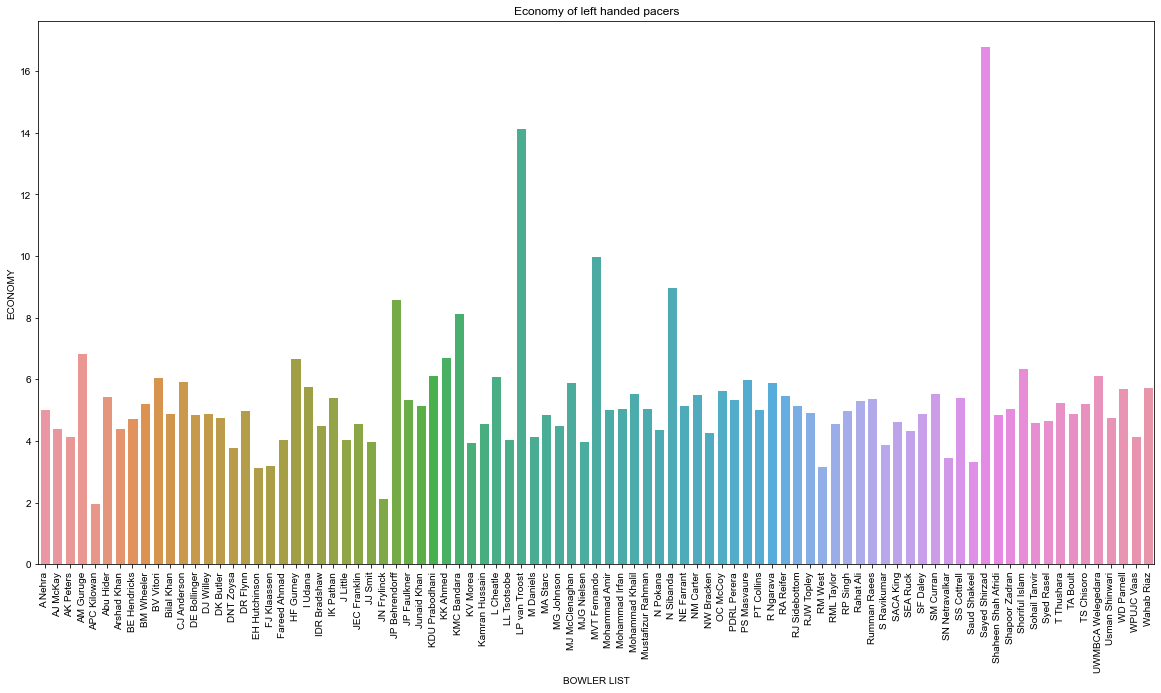

In [12]:
plt.figure(figsize=(20,10))
plt.title('Economy of left handed pacers')
tips={'bowlers': bowllp, 'eco' : ecolp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

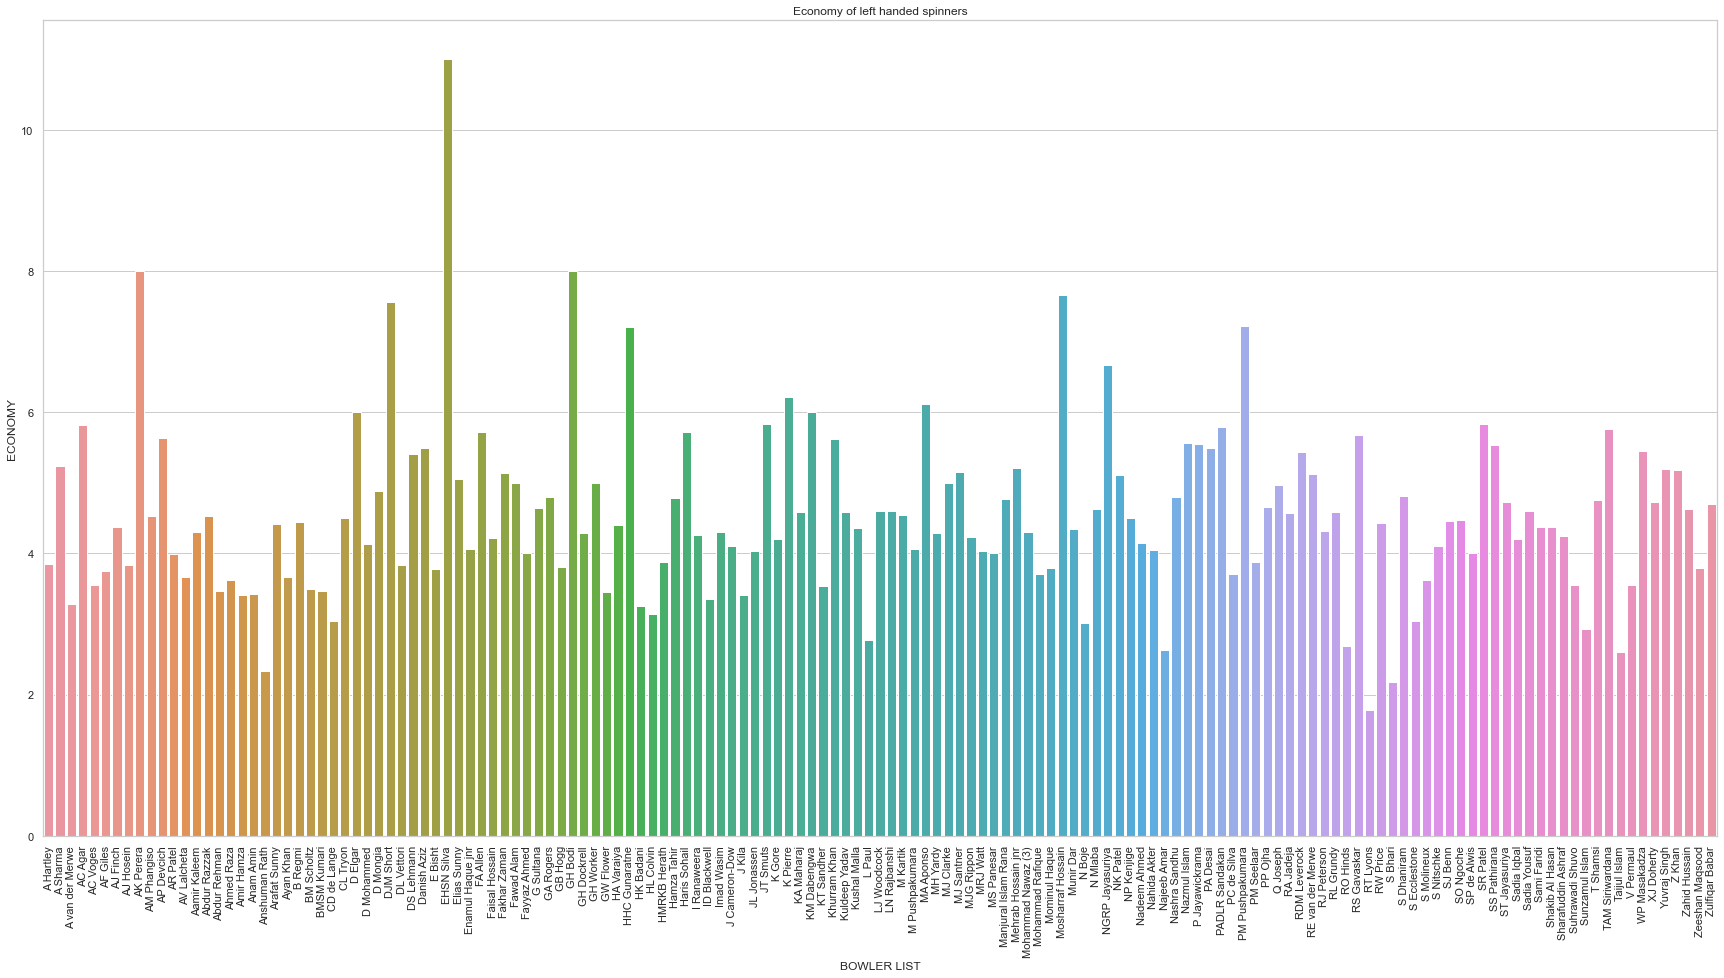

In [13]:
plt.figure(figsize=(30,15))
plt.title('Economy of left handed spinners')
tips={'bowlers': bowlls, 'eco' : ecols}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

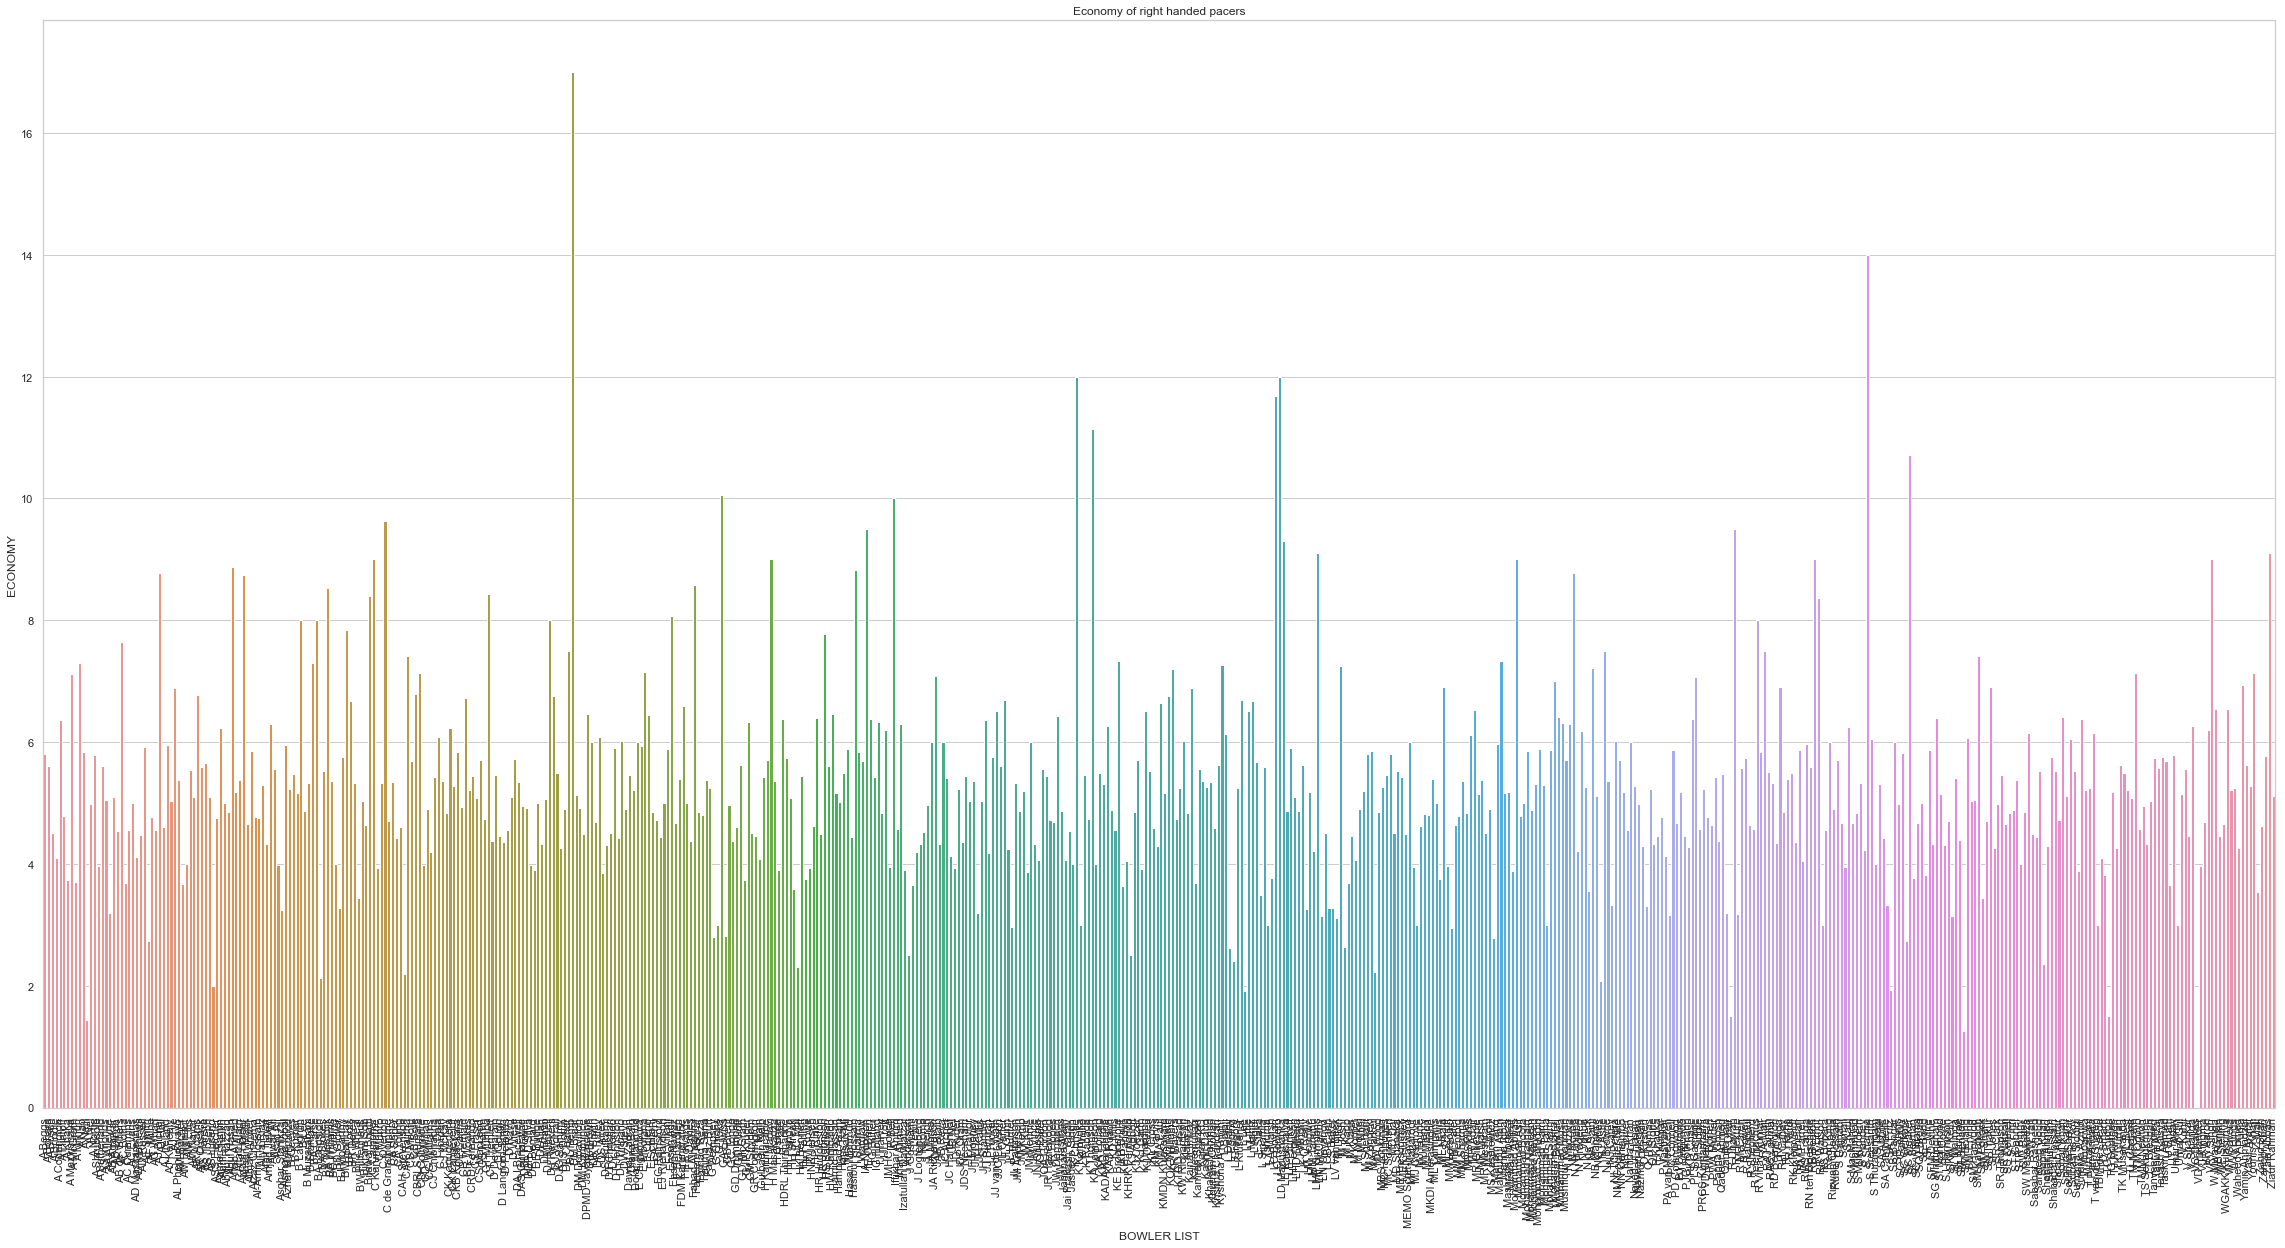

In [14]:
plt.figure(figsize=(40,20))
plt.title('Economy of right handed pacers')
tips={'bowlers': bowlrp, 'eco' : ecorp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

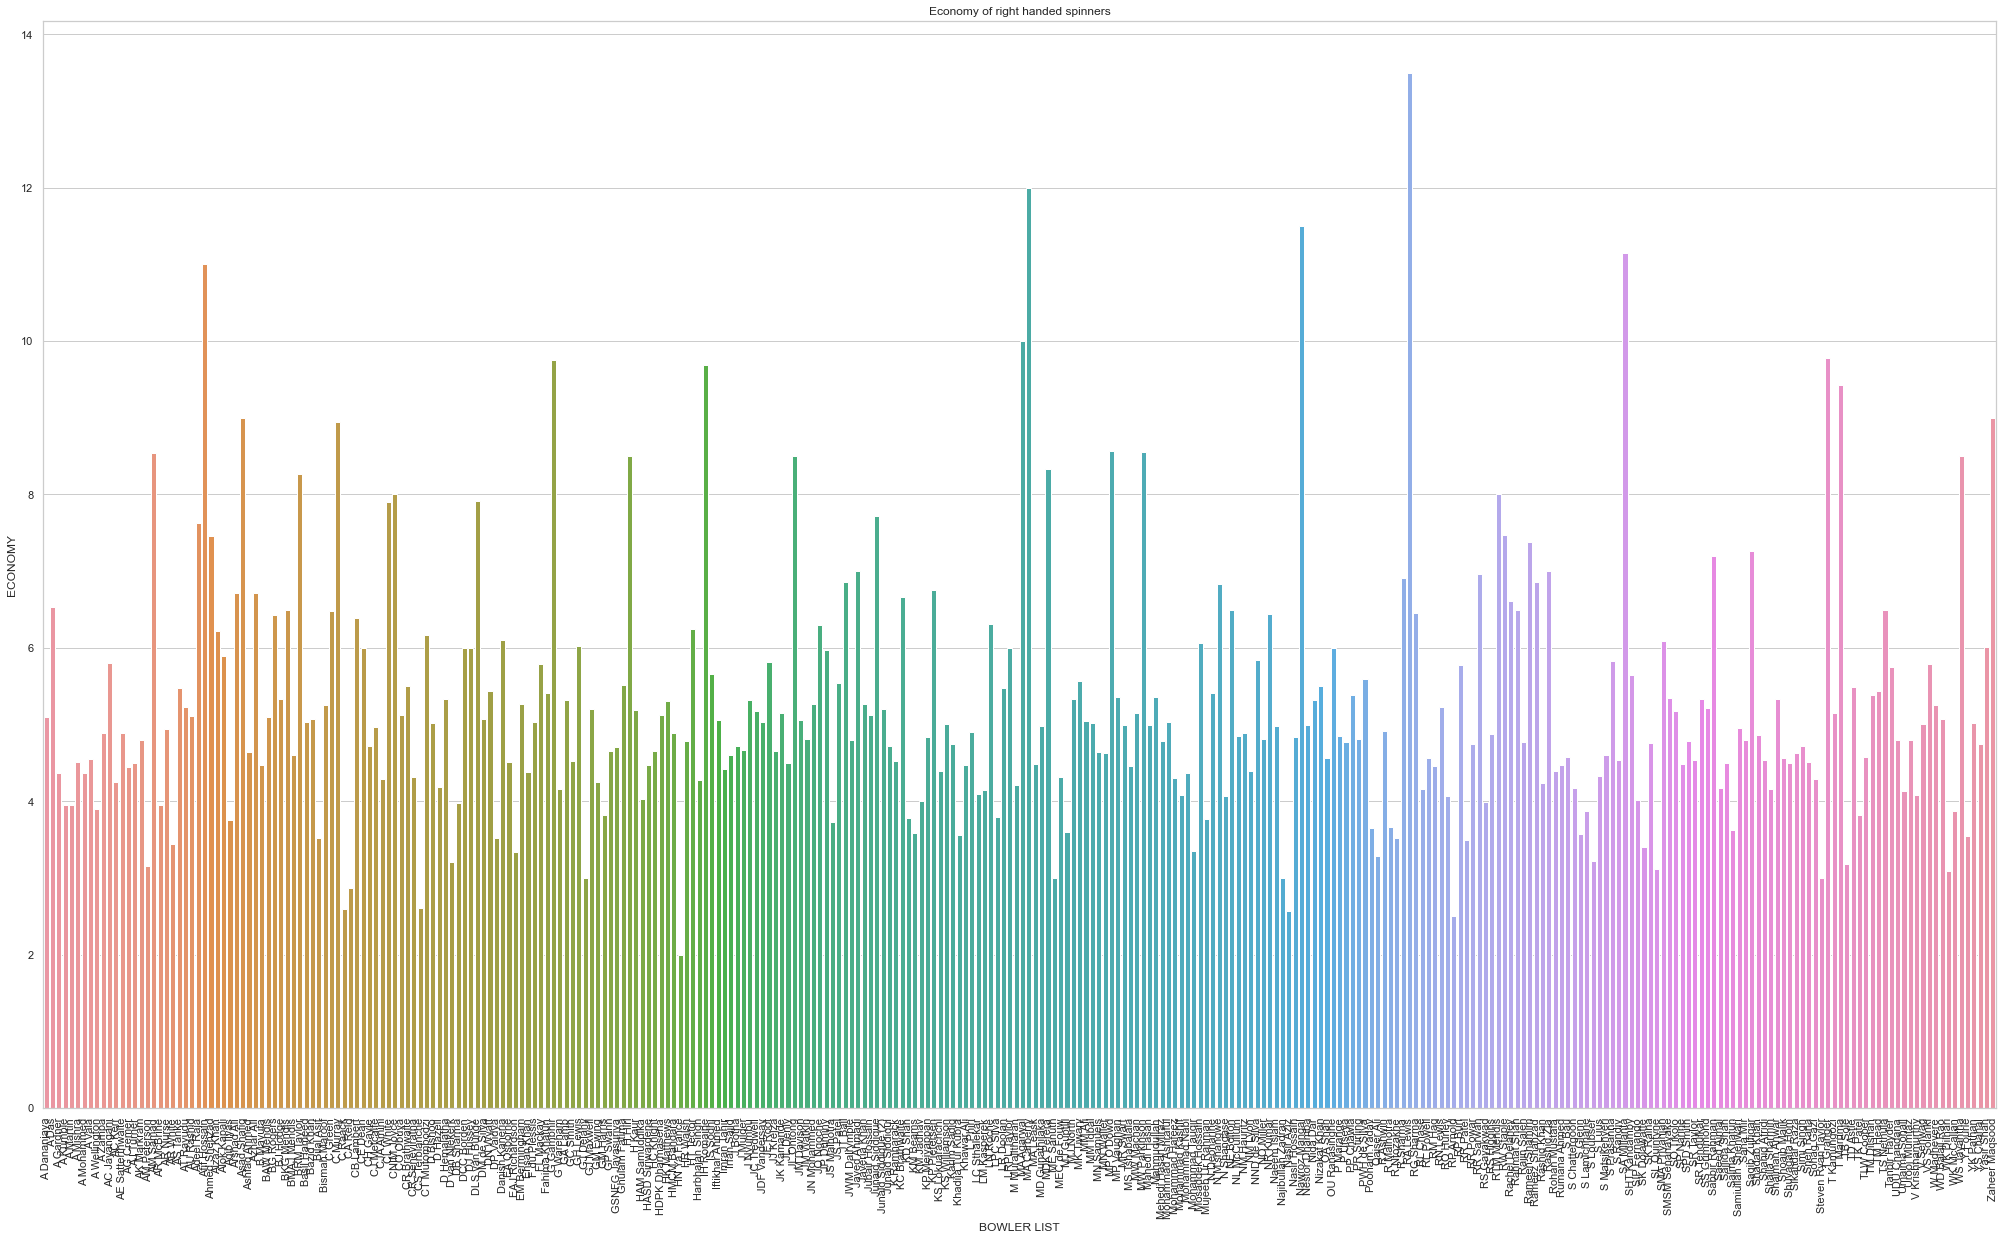

In [15]:
plt.figure(figsize=(35,20))
plt.title('Economy of right handed spinners')
tips={'bowlers': bowlrs, 'eco' : ecors}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [16]:
def variance(data):
    n=len(data)
    mean=sum(data)/n;
    dev=[(x-mean)**2 for x in data]
    var=sum(dev)/n
    return var

def stddev(data):
    n=len(data)
    var=variance(data)
    return math.sqrt(var)

In [17]:
#variance and standard deviation for left pace
print("The mean economy of the bowlers of left pace are:",np.mean(ecolp))
print("The variance of economy of the bowlers of left pace are:",variance(ecolp))
print("The standard deviation of economy of the bowlers of left pace are:",stddev(ecolp))

The mean economy of the bowlers of left pace are: 5.313538592409424
The variance of economy of the bowlers of left pace are: 3.9189916337376163
The standard deviation of economy of the bowlers of left pace are: 1.9796443200074139


In [18]:
#variance and standard deviation for left spin
print("The mean economy of the bowlers of left spin are:",np.mean(ecols))
print("The variance of economy of the bowlers of left spin are:",variance(ecols))
print("The standard deviation of economy of the bowlers of left spin are:",stddev(ecols))

The mean economy of the bowlers of left spin are: 4.55410797909123
The variance of economy of the bowlers of left spin are: 1.4549722731691106
The standard deviation of economy of the bowlers of left spin are: 1.2062223149855547


In [19]:
#variance and standard deviation for right pace
print("The mean economy of the bowlers of right pace are:",np.mean(ecorp))
print("The variance of economy of the bowlers of right pace are:",variance(ecorp))
print("The standard deviation of economy of the bowlers of right pace are:",stddev(ecorp))

The mean economy of the bowlers of right pace are: 5.265418740174953
The variance of economy of the bowlers of right pace are: 2.6470852468377393
The standard deviation of economy of the bowlers of right pace are: 1.6269865539818513


In [20]:
#variance and standard deviation for right spin
print("The mean economy of the bowlers of right spin are:",np.mean(ecors))
print("The variance of economy of the bowlers of right spin are:",variance(ecors))
print("The standard deviation of economy of the bowlers of right spin are:",stddev(ecors))

The mean economy of the bowlers of right spin are: 5.251905713125445
The variance of economy of the bowlers of right spin are: 2.617086387599867
The standard deviation of economy of the bowlers of right spin are: 1.6177411373887562


In [21]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=ecols, b=ecors, equal_var=False))
print(stats.ttest_ind(a=ecols, b=ecorp, equal_var=False))
print(stats.ttest_ind(a=ecols, b=ecolp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-5.131659962296525, pvalue=4.6310508336519166e-07)
Ttest_indResult(statistic=-5.905888802831381, pvalue=9.673740784889137e-09)
Ttest_indResult(statistic=-3.253056486646607, pvalue=0.001460319390327459)


In [22]:
print(len(ecolp))
print(len(ecols))
print(len(ecorp))
print(len(ecors))

89
147
584
308


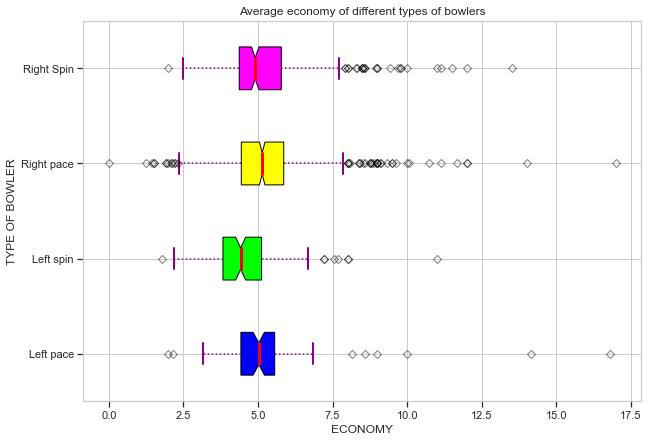

In [23]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot([ecolp,ecols,ecorp,ecors], patch_artist = True,notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

#whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',linewidth = 1.5,linestyle =":")

#caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',color ='#e7298a',alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Left pace', 'Left spin','Right pace', 'Right Spin'])
 
# Adding title
plt.title("Average economy of different types of bowlers")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set(xlabel='ECONOMY', ylabel='TYPE OF BOWLER')
# show plot
plt.show()

# Some inferences drawn
> The no. of right handed bowlers (=79%) are much more than the number of left handed bowlers (=21%)

> The economy of left handed spinners is the least (4.70) among all the four types of bowlers 

> On the whole, the economy of left handed bowlers is lower compared to the economy of right handed bowlers

# Analysis on the economy of the bowlers on left handed batsman

In [24]:
ecolp=[]
for i in range(len(dflp)):
    if(dflp['inning_number'][i]==1.0):
        ecolp.append(dflp['economy_left'][i])
    else:
        break
ecols=[]
for i in range(len(dfls)):
    if(dfls['inning_number'][i]==1.0):
        ecols.append(dfls['economy_left'][i])
    else:
        break
ecorp=[]
for i in range(len(dfrp)):
    if(dfrp['inning_number'][i]==1.0):
        ecorp.append(dfrp['economy_left'][i])
    else:
        break
        
ecors=[]
for i in range(len(dfrs)):
    if(dfrs['inning_number'][i]==1.0):
        ecors.append(dfrs['economy_left'][i])
    else:
        break

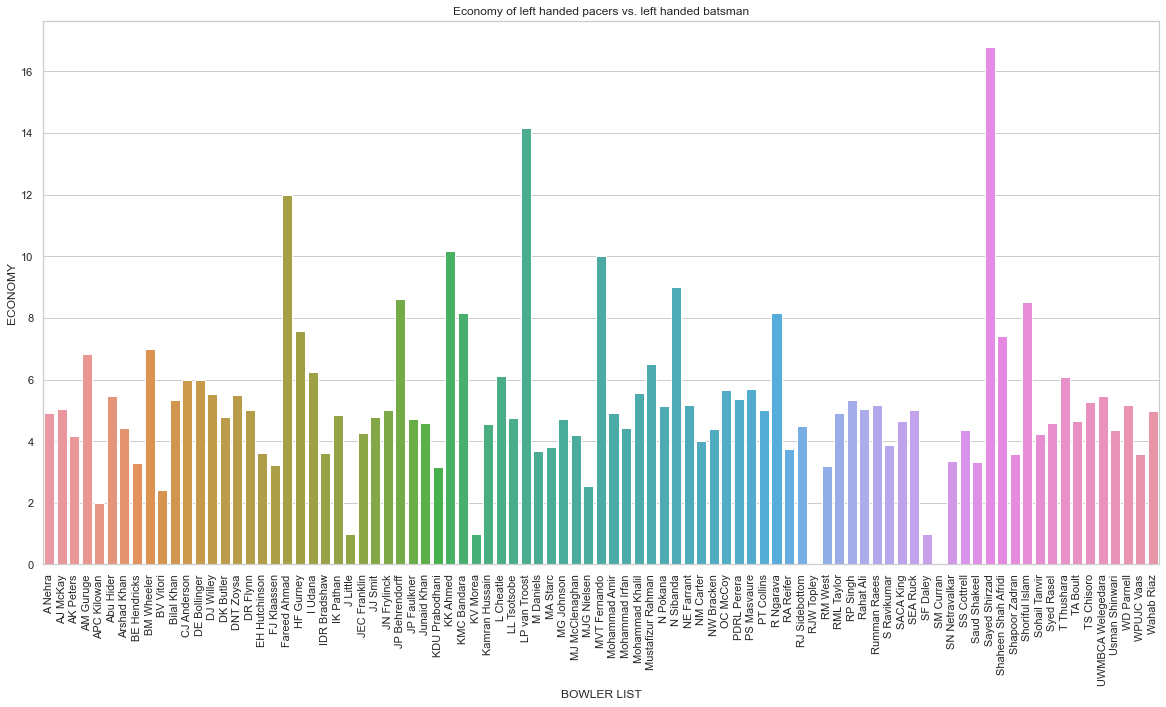

In [25]:
plt.figure(figsize=(20,10))
plt.title('Economy of left handed pacers vs. left handed batsman')
tips={'bowlers': bowllp, 'eco' : ecolp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

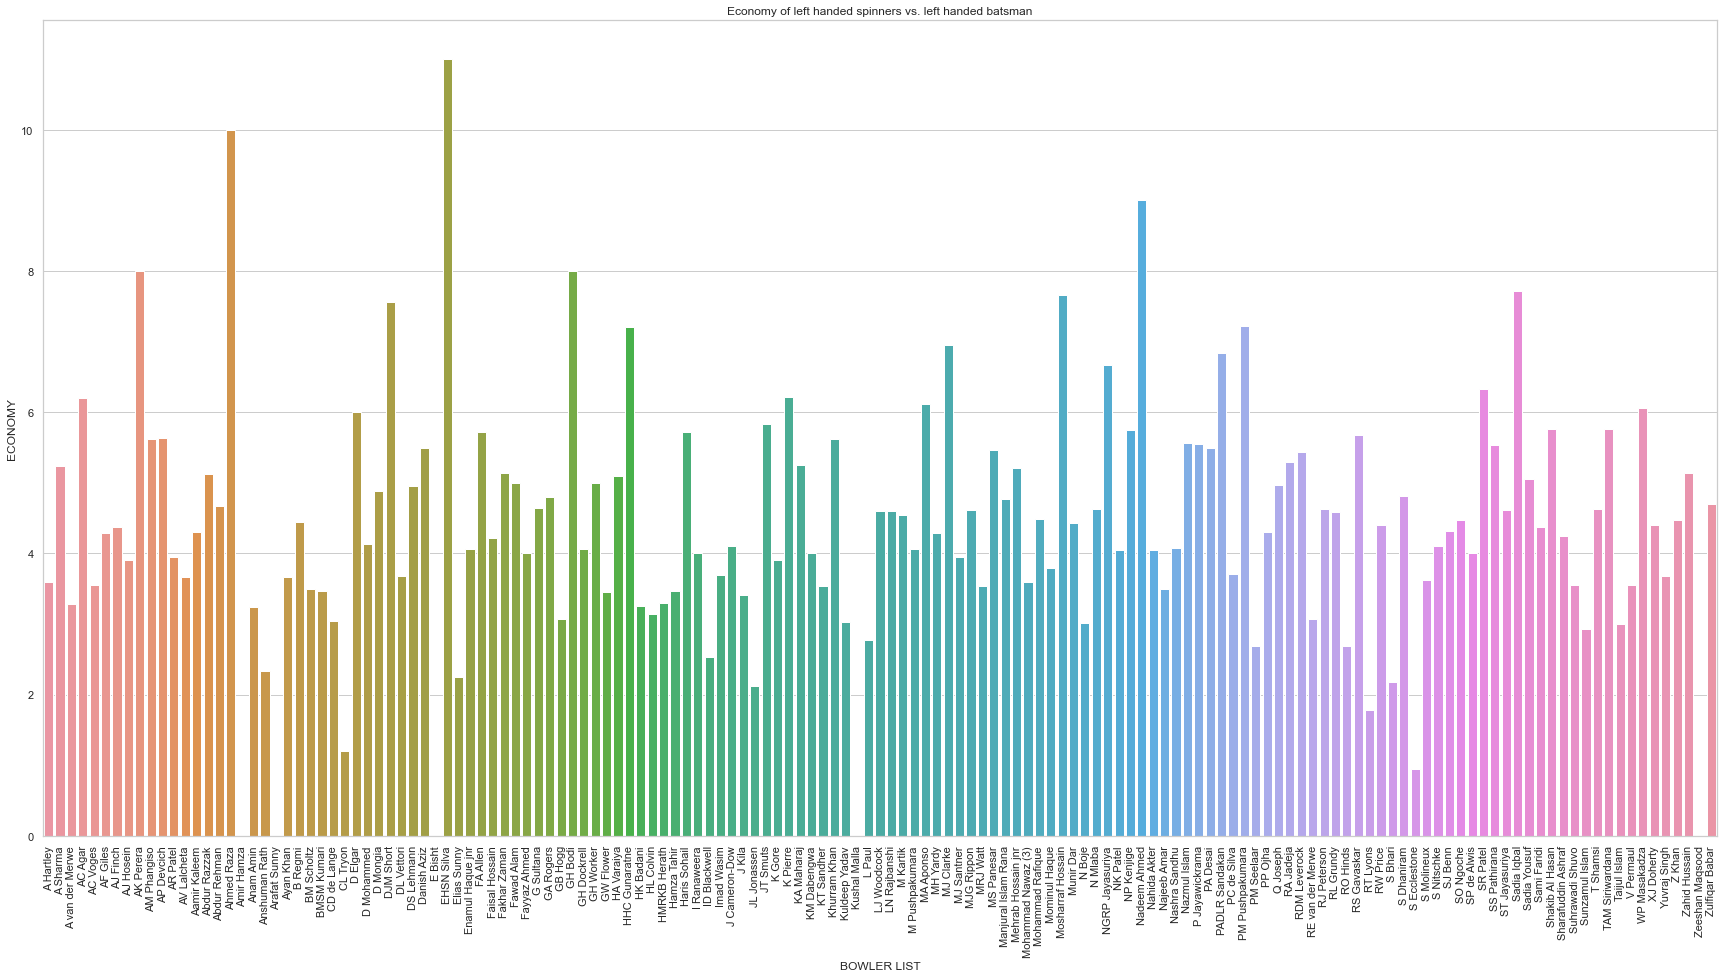

In [26]:
plt.figure(figsize=(30,15))
plt.title('Economy of left handed spinners vs. left handed batsman')
tips={'bowlers': bowlls, 'eco' : ecols}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

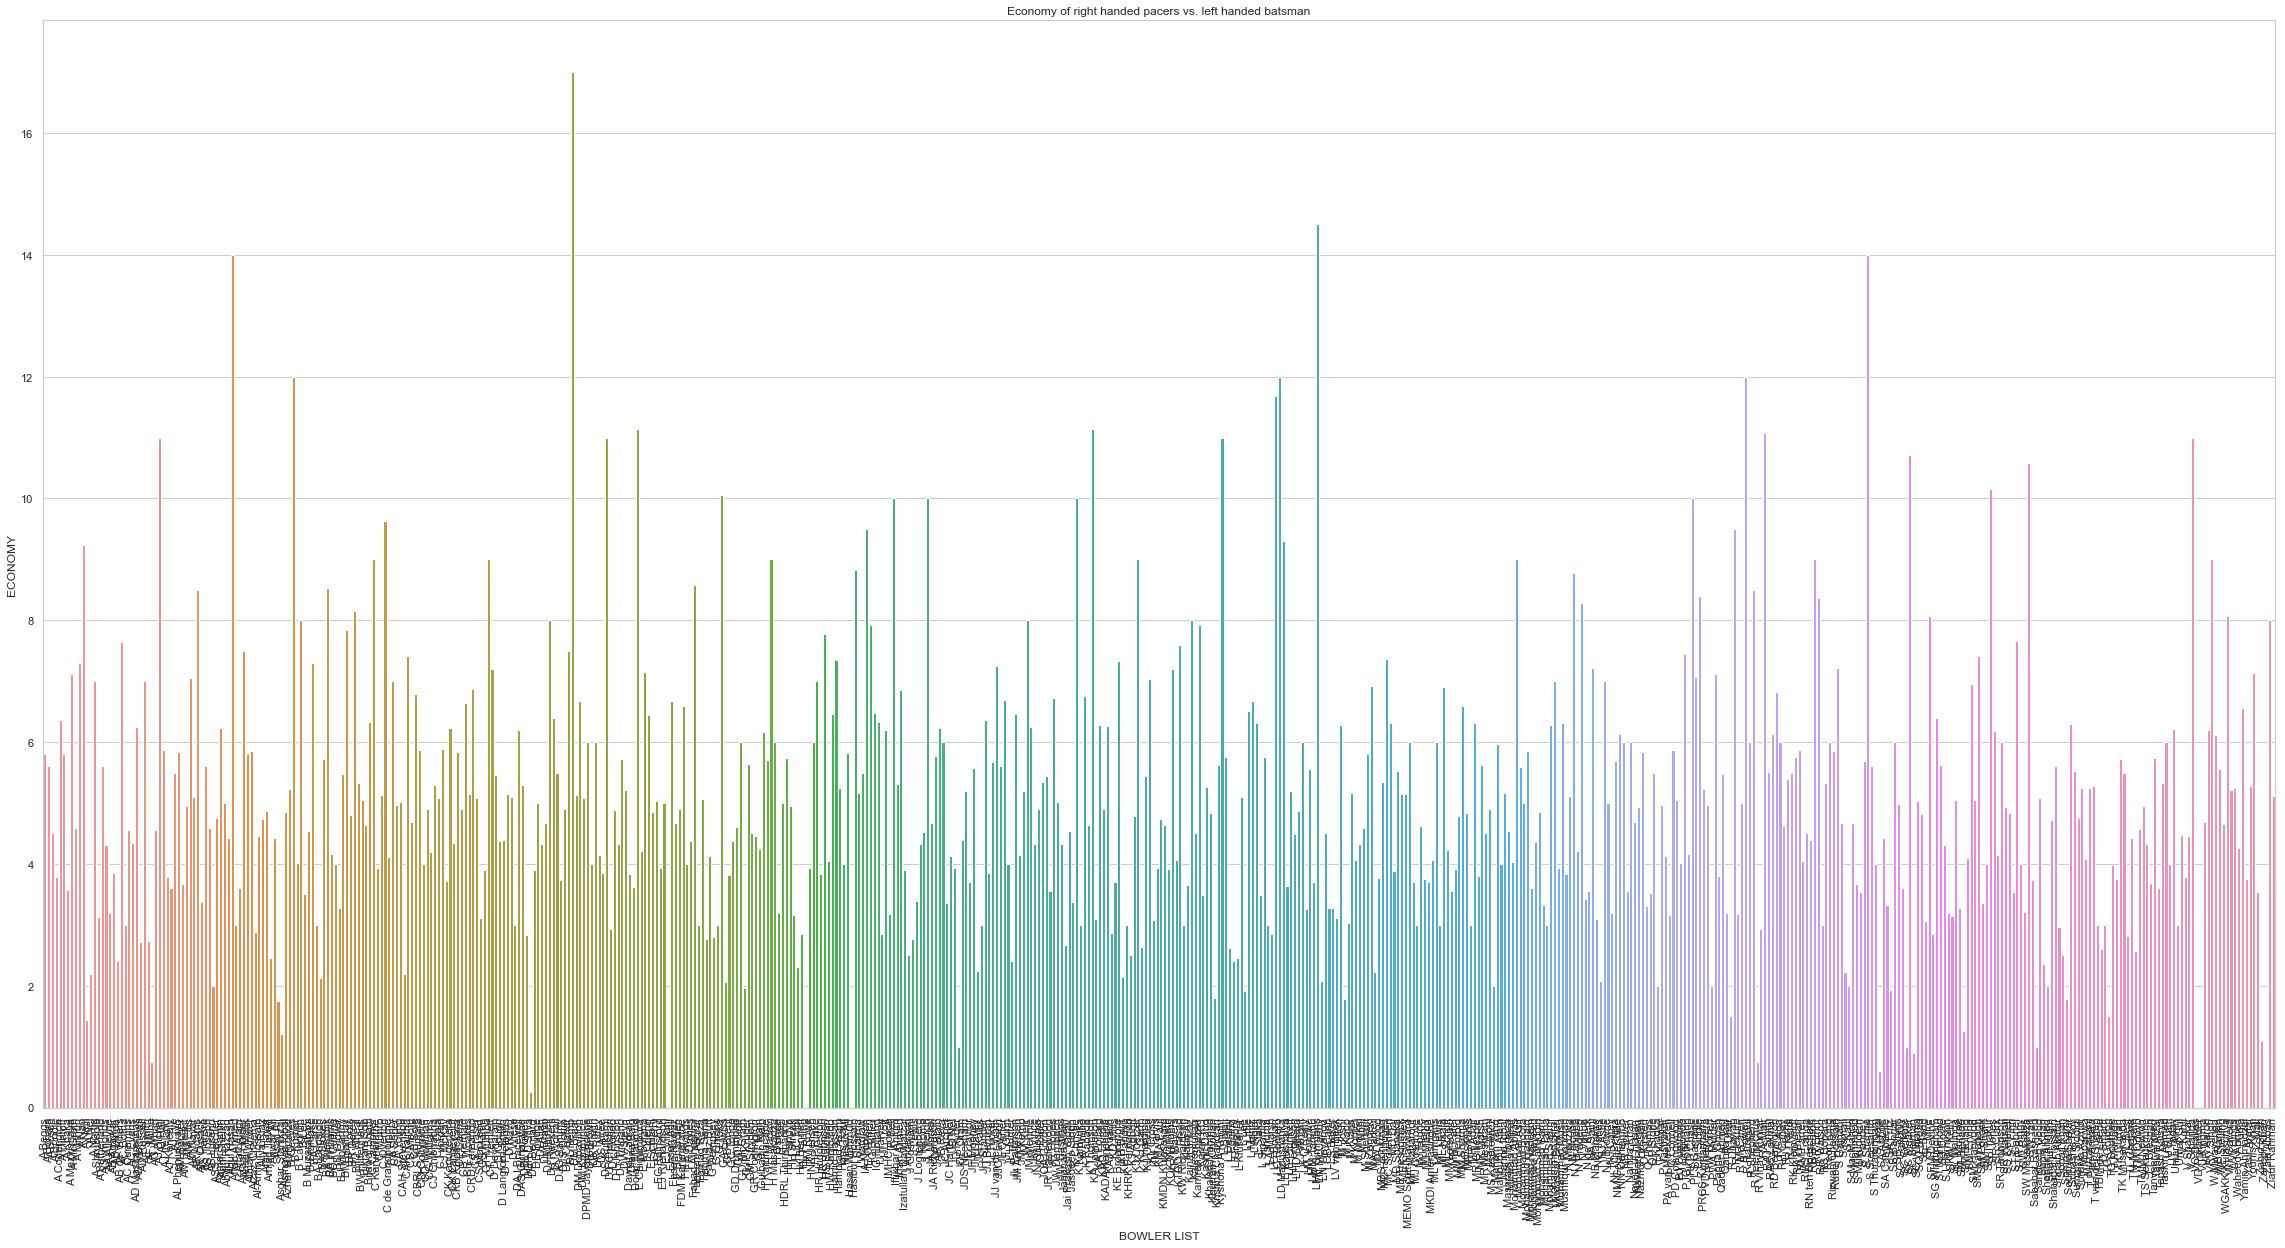

In [27]:
plt.figure(figsize=(40,20))
plt.title('Economy of right handed pacers vs. left handed batsman')
tips={'bowlers': bowlrp, 'eco' : ecorp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

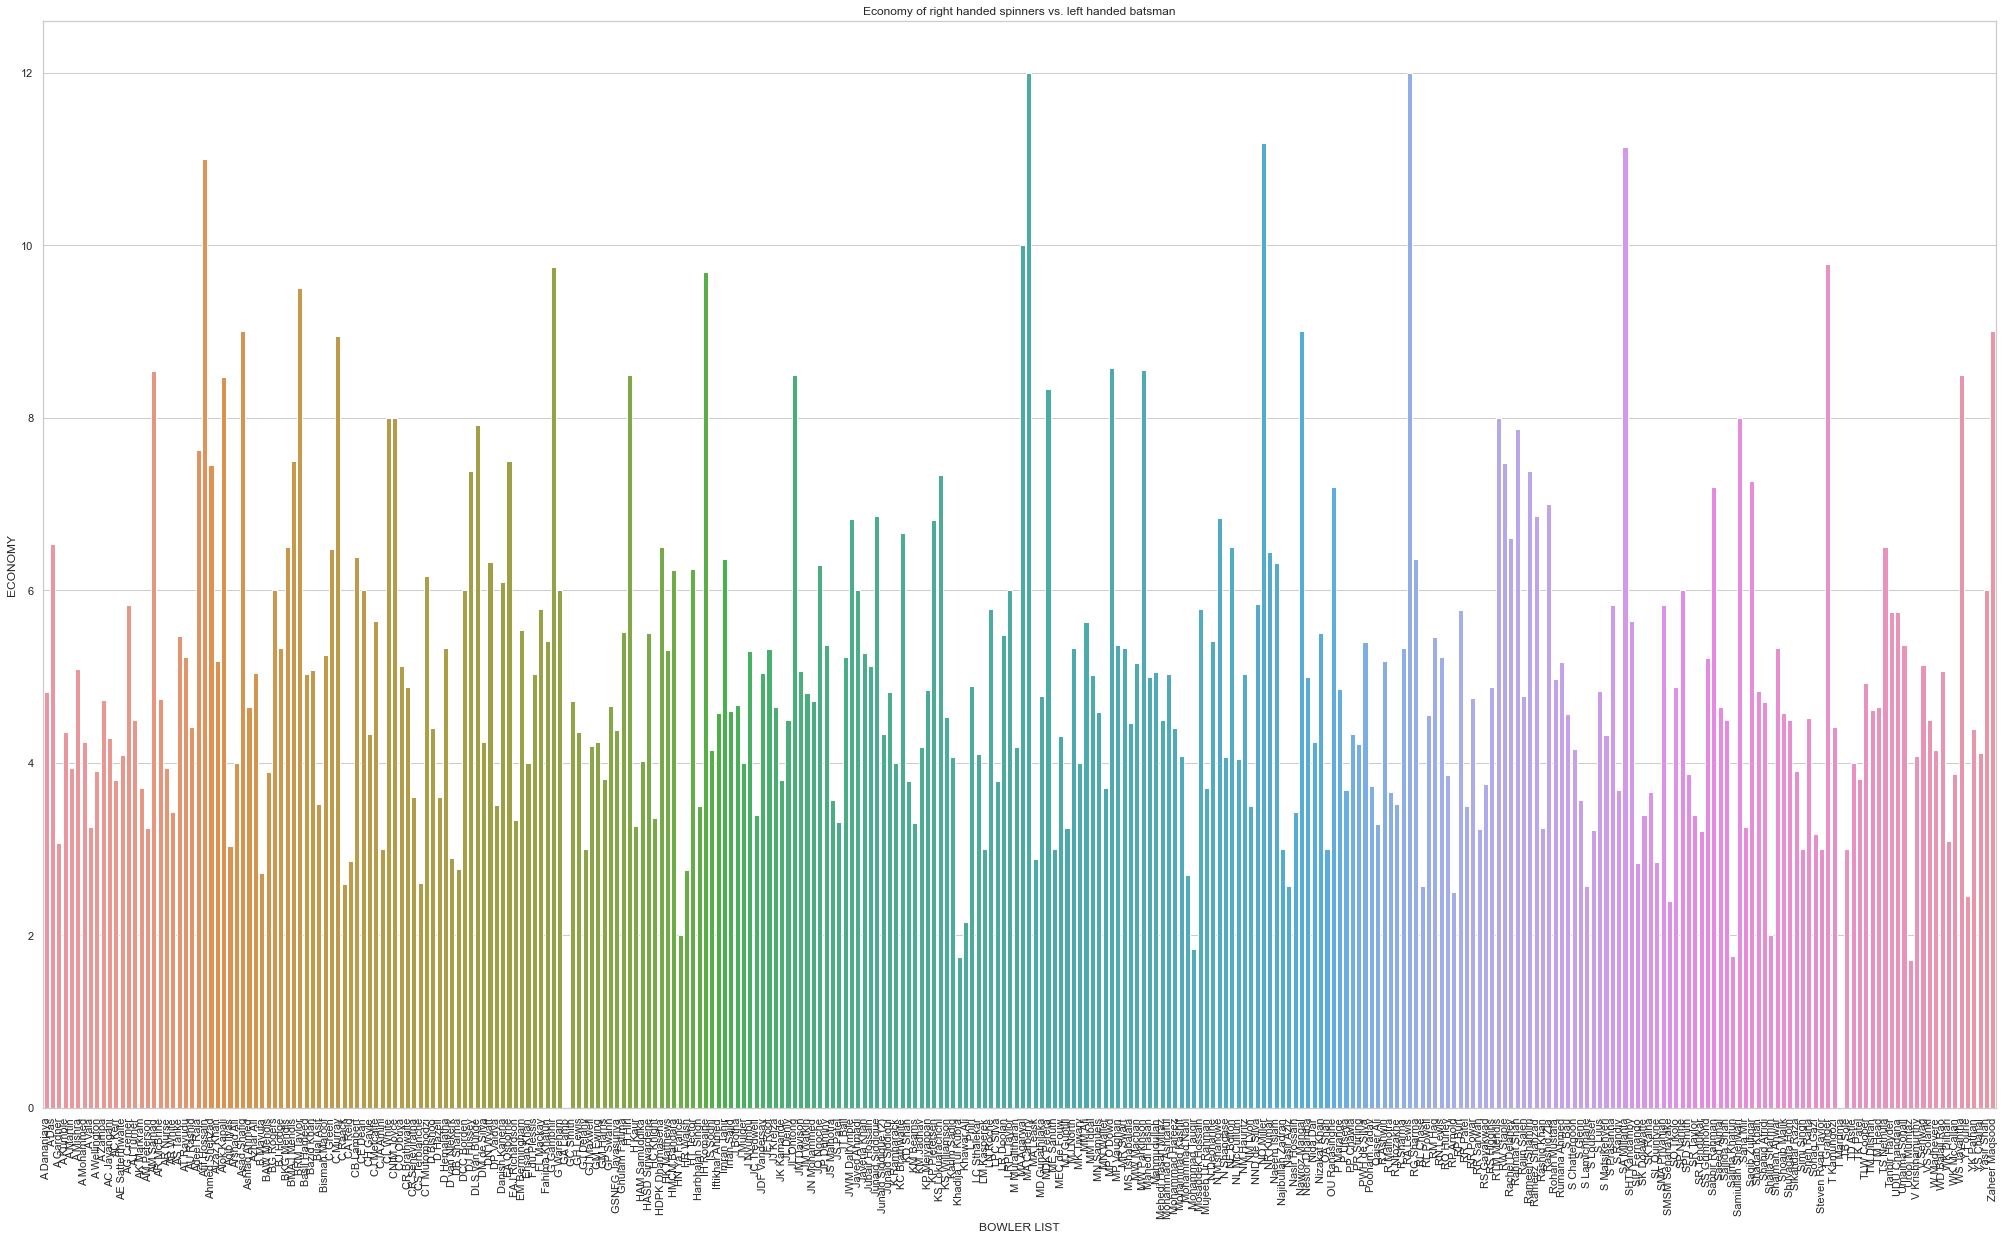

In [28]:
plt.figure(figsize=(35,20))
plt.title('Economy of right handed spinners vs. left handed batsman')
tips={'bowlers': bowlrs, 'eco' : ecors}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [29]:
#variance and standard deviation for left pace
print("The mean economy of the bowlers of left pace vs. left handed batsman are:",np.mean(ecolp))
print("The variance of economy of the bowlers of left pace vs. left handed batsman are:",variance(ecolp))
print("The standard deviation of economy of the bowlers of left pace vs. left handed batsman are:",stddev(ecolp))

The mean economy of the bowlers of left pace vs. left handed batsman are: 5.168684483229697
The variance of economy of the bowlers of left pace vs. left handed batsman are: 6.42607211620684
The standard deviation of economy of the bowlers of left pace vs. left handed batsman are: 2.534969845226337


In [30]:
#variance and standard deviation for left spin
print("The mean economy of the bowlers of left spin vs. left handed batsman are:",np.mean(ecols))
print("The variance of economy of the bowlers of left spin vs. left handed batsman are:",variance(ecols))
print("The standard deviation of economy of the bowlers of left spin vs. left handed batsman are:",stddev(ecols))

The mean economy of the bowlers of left spin vs. left handed batsman are: 4.4350592618035485
The variance of economy of the bowlers of left spin vs. left handed batsman are: 2.9455154153478103
The standard deviation of economy of the bowlers of left spin vs. left handed batsman are: 1.71625039412896


In [31]:
#variance and standard deviation for right pace
print("The mean economy of the bowlers of right pace vs. left handed batsman are:",np.mean(ecorp))
print("The variance of economy of the bowlers of right pace vs. left handed batsman are:",variance(ecorp))
print("The standard deviation of economy of the bowlers of right pace vs. left handed batsman are:",stddev(ecorp))

The mean economy of the bowlers of right pace vs. left handed batsman are: 5.019154946714672
The variance of economy of the bowlers of right pace vs. left handed batsman are: 4.924548779959046
The standard deviation of economy of the bowlers of right pace vs. left handed batsman are: 2.219132438580232


In [32]:
#variance and standard deviation for right pace
print("The mean economy of the bowlers of right spin vs. left handed batsman are:",np.mean(ecors))
print("The variance of economy of the bowlers of right spin vs. left handed batsman are:",variance(ecors))
print("The standard deviation of economy of the bowlers of right spin vs. left handed batsman are:",stddev(ecors))

The mean economy of the bowlers of right spin vs. left handed batsman are: 4.983528925038861
The variance of economy of the bowlers of right spin vs. left handed batsman are: 3.502717302144509
The standard deviation of economy of the bowlers of right spin vs. left handed batsman are: 1.8715547820313754


In [33]:
print(len(ecolp))
print(len(ecols))
print(len(ecorp))
print(len(ecors))

89
147
584
308


In [34]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=ecols, b=ecors, equal_var=False))
print(stats.ttest_ind(a=ecols, b=ecorp, equal_var=False))
print(stats.ttest_ind(a=ecols, b=ecolp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-3.086151334377414, pvalue=0.002210276950921563)
Ttest_indResult(statistic=-3.452522248163086, pvalue=0.0006407177295102354)
Ttest_indResult(statistic=-2.4030911013480534, pvalue=0.017595778838327542)


In [35]:
print(len(ecolp))
print(len(ecols))
print(len(ecorp))
print(len(ecors))

89
147
584
308


# Some inferences drawn
> The economy of left handed spinners against left handed batsman is the least (4.64) among all the four types of bowlers 

> On the whole, the economy of left handed bowlers is lower compared to the economy of right handed bowlers against left handed batsman

> The performance of right handed pacers and spinners is almost the same against the left handed batsman

# Analysis on the economy of the bowlers on right handed batsman

In [36]:
ecolp=[]
for i in range(len(dflp)):
    if(dflp['inning_number'][i]==1.0):
        ecolp.append(dflp['economy_right'][i])
    else:
        break
ecols=[]
for i in range(len(dfls)):
    if(dfls['inning_number'][i]==1.0):
        ecols.append(dfls['economy_right'][i])
    else:
        break
ecorp=[]
for i in range(len(dfrp)):
    if(dfrp['inning_number'][i]==1.0):
        ecorp.append(dfrp['economy_right'][i])
    else:
        break
        
ecors=[]
for i in range(len(dfrs)):
    if(dfrs['inning_number'][i]==1.0):
        ecors.append(dfrs['economy_right'][i])
    else:
        break

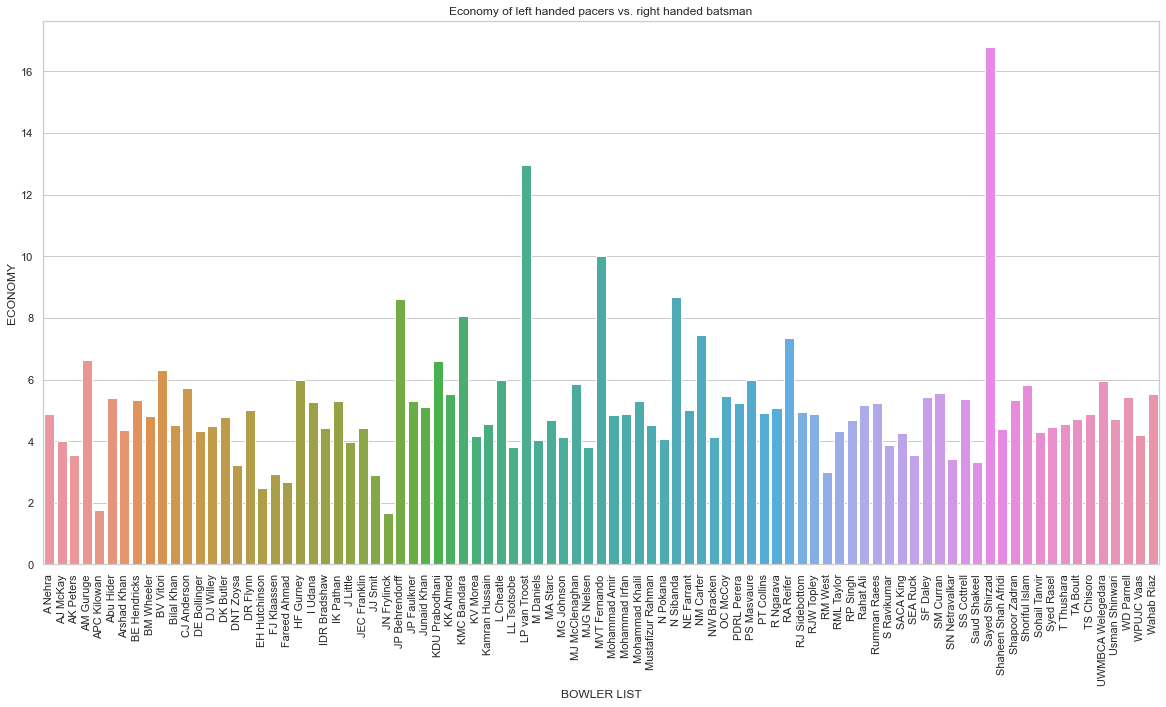

In [37]:
plt.figure(figsize=(20,10))
plt.title('Economy of left handed pacers vs. right handed batsman')
tips={'bowlers': bowllp, 'eco' : ecolp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

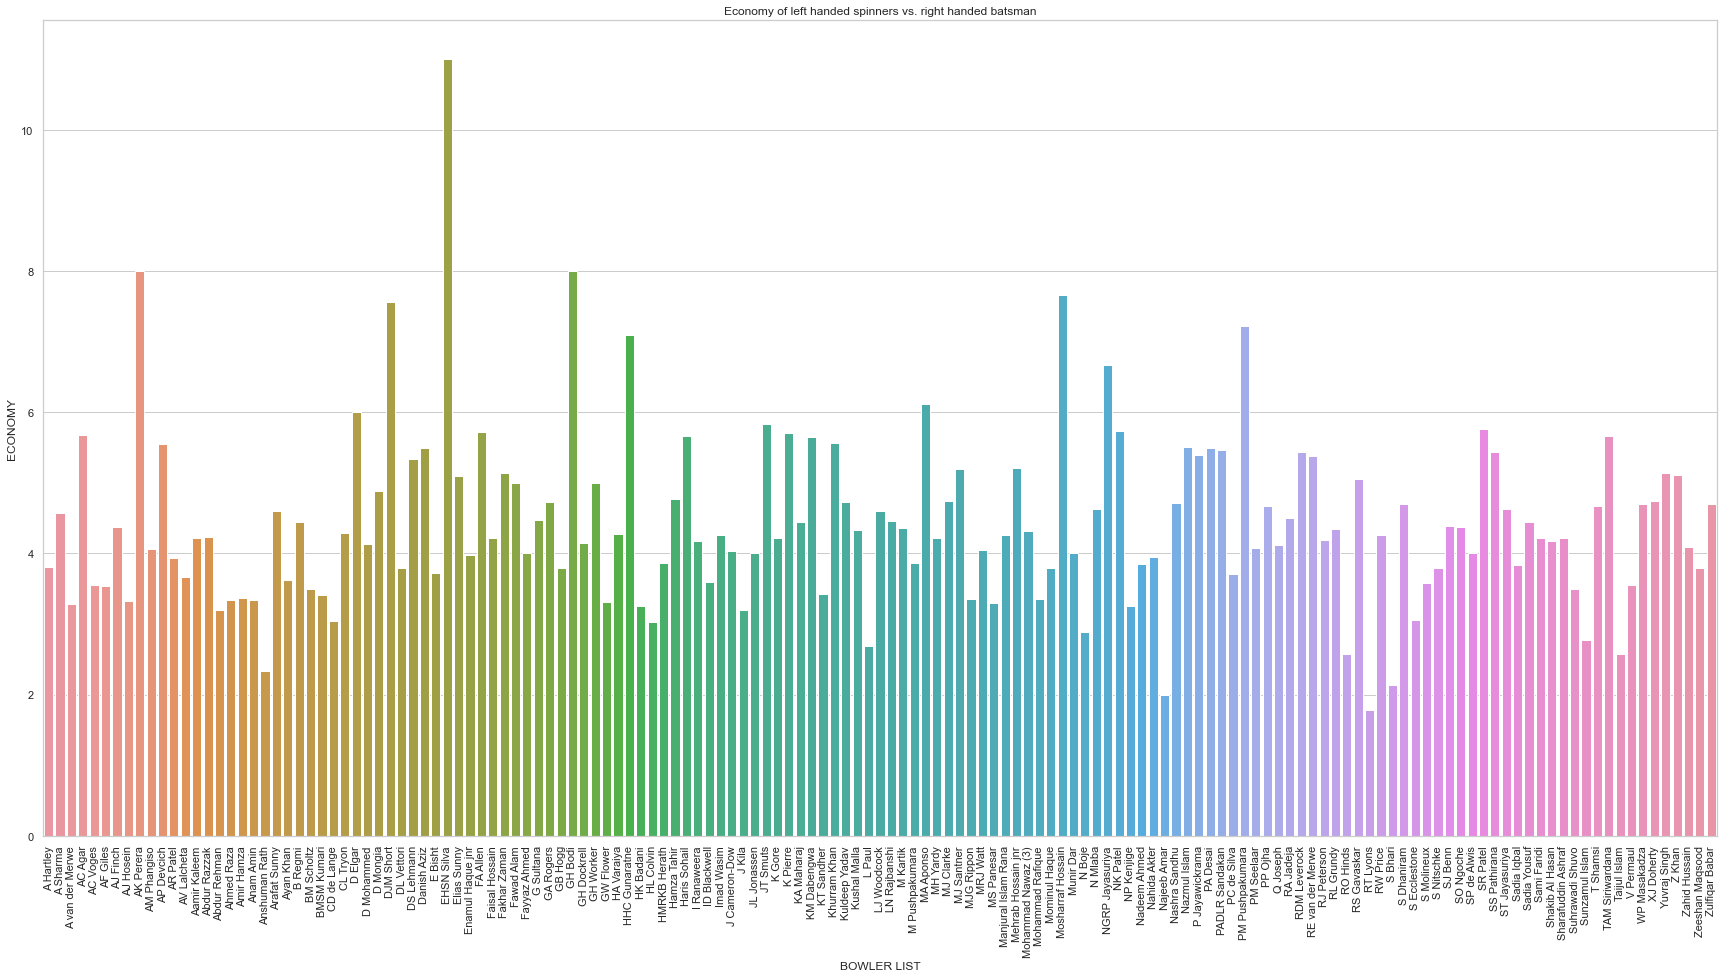

In [38]:
plt.figure(figsize=(30,15))
plt.title('Economy of left handed spinners vs. right handed batsman')
tips={'bowlers': bowlls, 'eco' : ecols}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

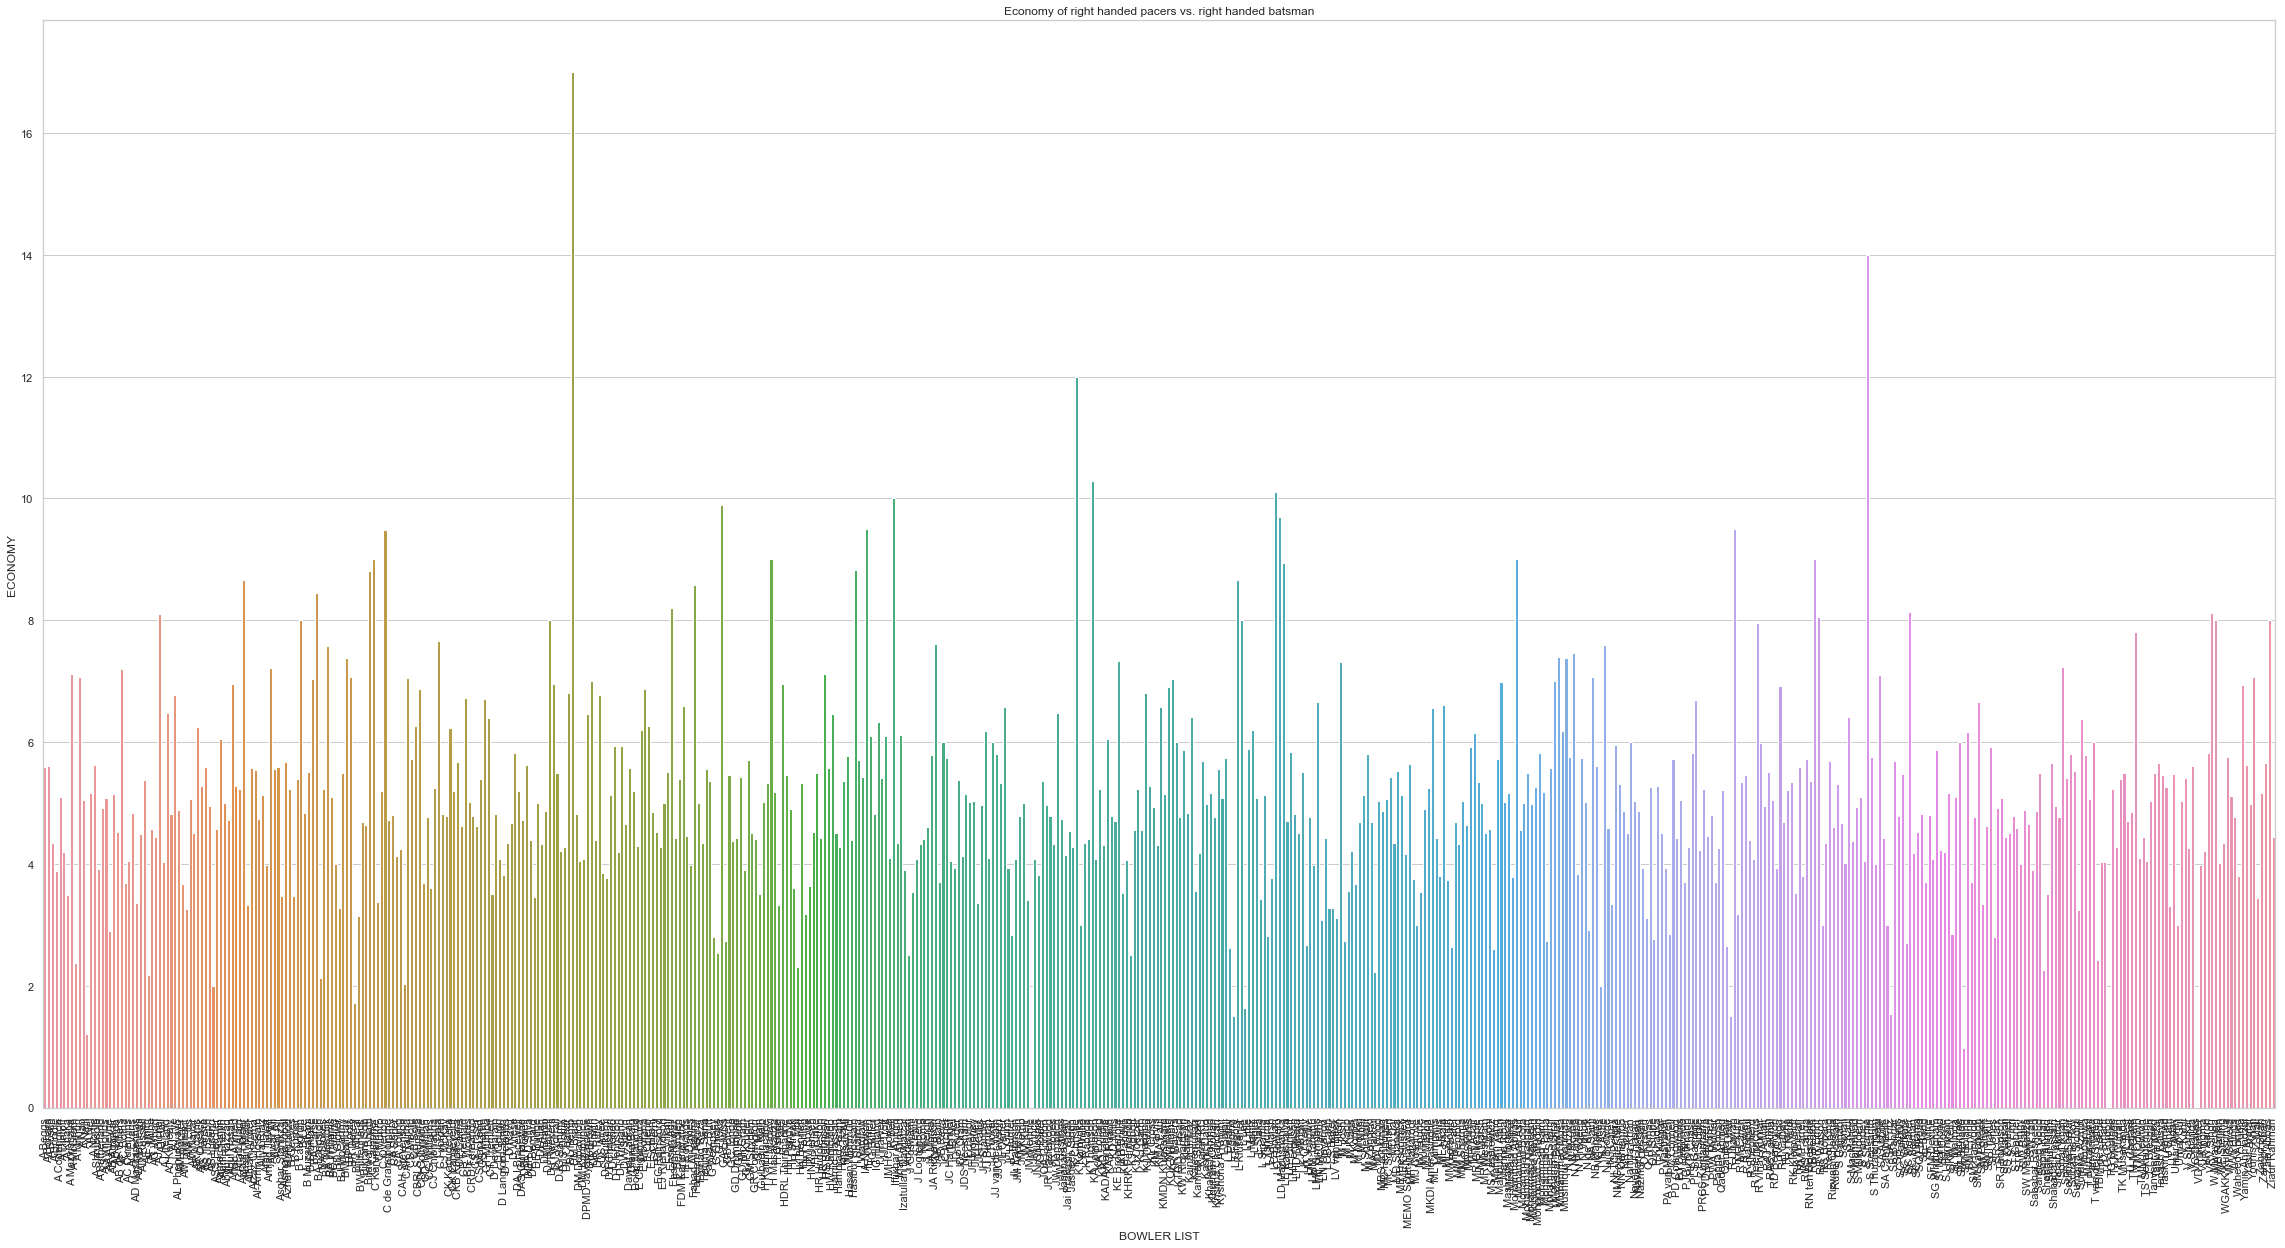

In [39]:
plt.figure(figsize=(40,20))
plt.title('Economy of right handed pacers vs. right handed batsman')
tips={'bowlers': bowlrp, 'eco' : ecorp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

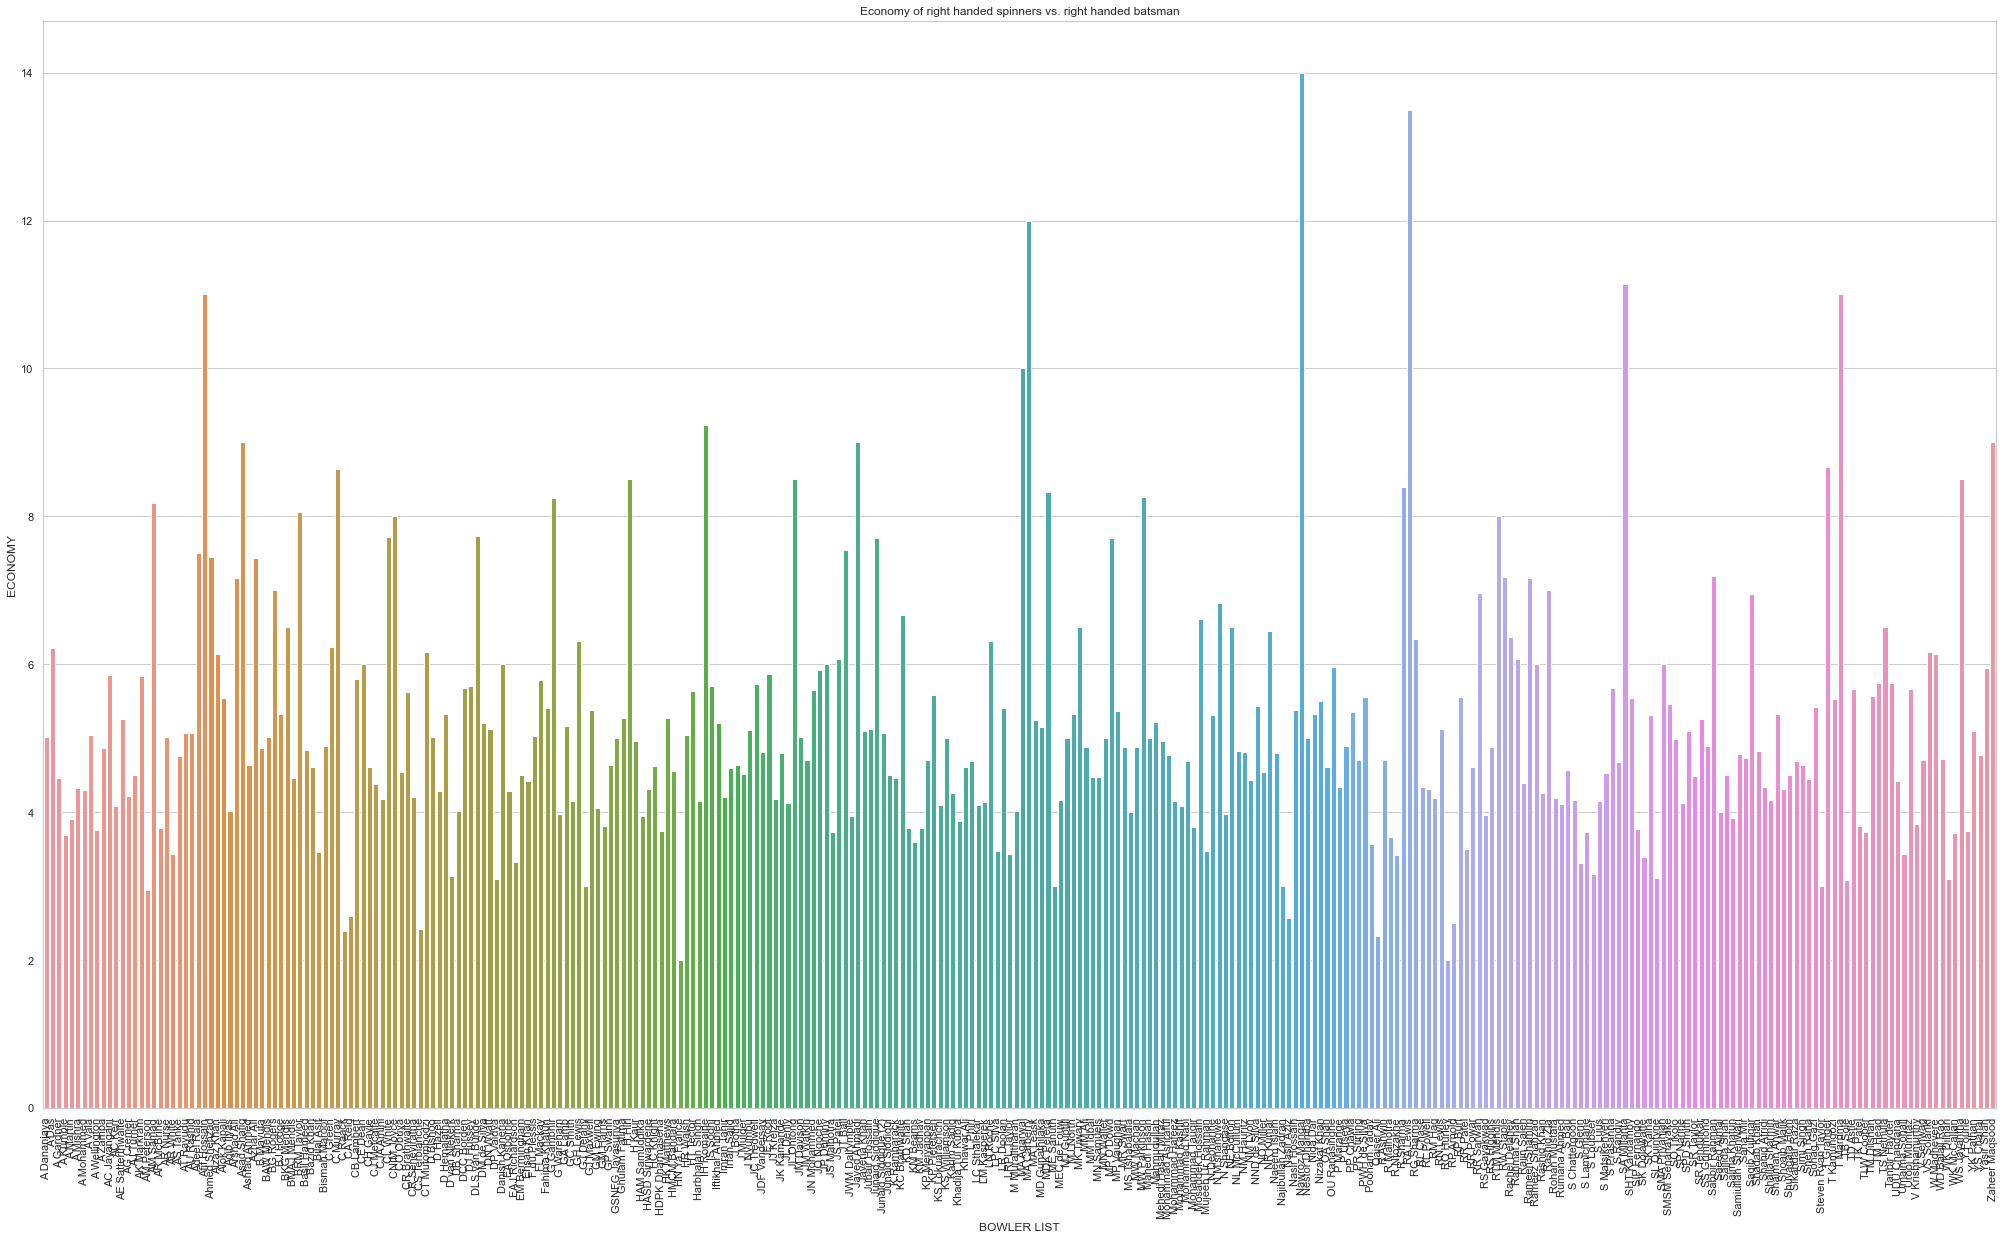

In [40]:
plt.figure(figsize=(35,20))
plt.title('Economy of right handed spinners vs. right handed batsman')
tips={'bowlers': bowlrs, 'eco' : ecors}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='bowlers', y="eco", data=tips)
ax.set(xlabel='BOWLER LIST', ylabel='ECONOMY')
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [41]:
#variance and standard deviation for left pace
print("The mean economy of the bowlers of left pace vs. right handed batsman are:",np.mean(ecolp))
print("The variance of economy of the bowlers of left pace vs. right handed batsman are:",variance(ecolp))
print("The standard deviation of economy of the bowlers of left pace vs. right handed batsman are:",stddev(ecolp))

The mean economy of the bowlers of left pace vs. right handed batsman are: 5.119443870129389
The variance of economy of the bowlers of left pace vs. right handed batsman are: 4.084717855051505
The standard deviation of economy of the bowlers of left pace vs. right handed batsman are: 2.0210684934092424


In [42]:
#variance and standard deviation for left spin
print("The mean economy of the bowlers of left spin vs. right handed batsman are:",np.mean(ecols))
print("The variance of economy of the bowlers of left spin vs. right handed batsman are:",variance(ecols))
print("The standard deviation of economy of the bowlers of left spin vs. right handed batsman are:",stddev(ecols))

The mean economy of the bowlers of left spin vs. right handed batsman are: 4.436317887984084
The variance of economy of the bowlers of left spin vs. right handed batsman are: 1.5147368863593162
The standard deviation of economy of the bowlers of left spin vs. right handed batsman are: 1.230746475257726


In [43]:
#variance and standard deviation for right pace
print("The mean economy of the bowlers of right pace vs. right handed batsman are:",np.mean(ecorp))
print("The variance of economy of the bowlers of right pace vs. right handed batsman are:",variance(ecorp))
print("The standard deviation of economy of the bowlers of right pace vs. left handed batsman are:",stddev(ecorp))

The mean economy of the bowlers of right pace vs. right handed batsman are: 5.050850184826144
The variance of economy of the bowlers of right pace vs. right handed batsman are: 2.731625746839894
The standard deviation of economy of the bowlers of right pace vs. left handed batsman are: 1.6527630643379874


In [44]:
#variance and standard deviation for right pace
print("The mean economy of the bowlers of right spin vs. right handed batsman are:",np.mean(ecors))
print("The variance of economy of the bowlers of right spin vs. right handed batsman are:",variance(ecors))
print("The standard deviation of economy of the bowlers of right spin vs. right handed batsman are:",stddev(ecors))

The mean economy of the bowlers of right spin vs. right handed batsman are: 5.188635768389286
The variance of economy of the bowlers of right spin vs. right handed batsman are: 2.87843785553392
The standard deviation of economy of the bowlers of right spin vs. right handed batsman are: 1.6965959611922692


In [45]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=ecols, b=ecors, equal_var=False))
print(stats.ttest_ind(a=ecols, b=ecorp, equal_var=False))
print(stats.ttest_ind(a=ecols, b=ecolp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-5.353127865949769, pvalue=1.496613181964634e-07)
Ttest_indResult(statistic=-5.007567652276763, pvalue=9.54154106700004e-07)
Ttest_indResult(statistic=-2.8665308227598034, pvalue=0.004854423177020741)


In [46]:
print(len(ecolp))
print(len(ecols))
print(len(ecorp))
print(len(ecors))

89
147
584
308


# Some inferences drawn
> The economy of left handed spinners against right handed batsman is the least (4.66) among all the four types of bowlers 

> On the whole, the economy of left handed bowlers is lower compared to the economy of right handed bowlers against right handed batsman

> The performance of right handed pacers and spinners is almost the same against the right handed batsman

### On the whole, it can be seen that the right handed batsman very slightly make less runs per over compared to left handed batsman